In [10]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import messagebox
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
clean_df = pd.read_csv('Clean_Dataset.csv')

# Data preprocessing
inputs_cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
               'destination_city', 'class', 'duration', 'days_left']
targets_col = 'price'
numeric_cols = ['duration', 'days_left']
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
                    'destination_city', 'class']

inputs_dataset = clean_df[inputs_cols].copy()
targets_set = clean_df[targets_col].copy()

# Scaling
scaler = MinMaxScaler()
inputs_dataset[numeric_cols] = scaler.fit_transform(inputs_dataset[numeric_cols])

# Encoding categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(inputs_dataset[categorical_cols])
encoder_cols = encoder.get_feature_names_out(categorical_cols)

# Combine numeric and encoded categorical data
X = np.hstack((inputs_dataset[numeric_cols], encoded_features))
y = targets_set

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Output to confirm the model has been trained
print('Trained the algorithm')

# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Display predictions (optional)
print(f"Predictions: {y_pred[:10]}")  # Display first 10 predictions

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display accuracy metrics
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Display the accuracy of the model
print('Accuracy of the model is: ', lr.score(X_test, y_test) * 100)



Trained the algorithm
X_train shape: (240122, 37)
y_train shape: (240122,)
X_test shape: (60031, 37)
y_test shape: (60031,)
Predictions: [10648. 52812.  -184. -4544.  4100.  5032. 54436. 50784.  -156.  4196.]
Mean Absolute Error (MAE): ₹4,541.49
Mean Squared Error (MSE): ₹44,949,412.83
R-squared (R²): 0.91
Accuracy of the model is:  91.20911590464652


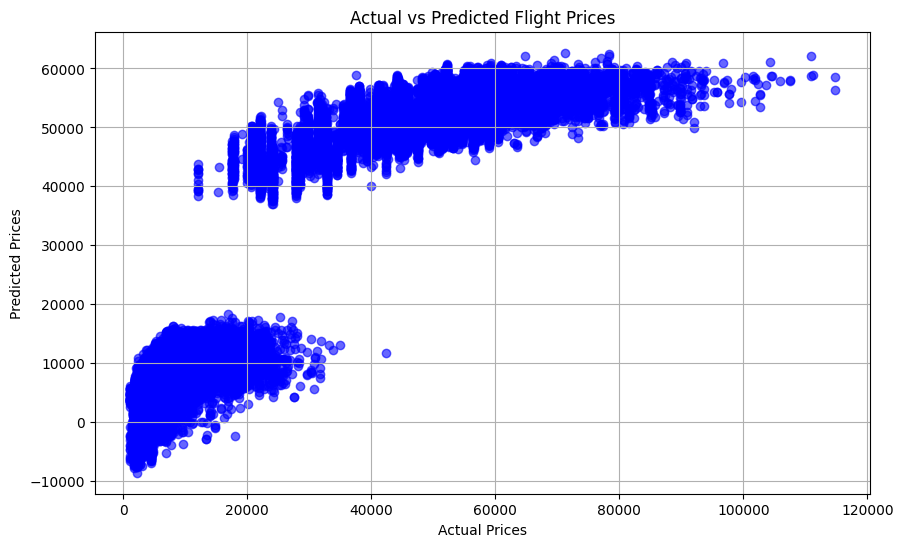

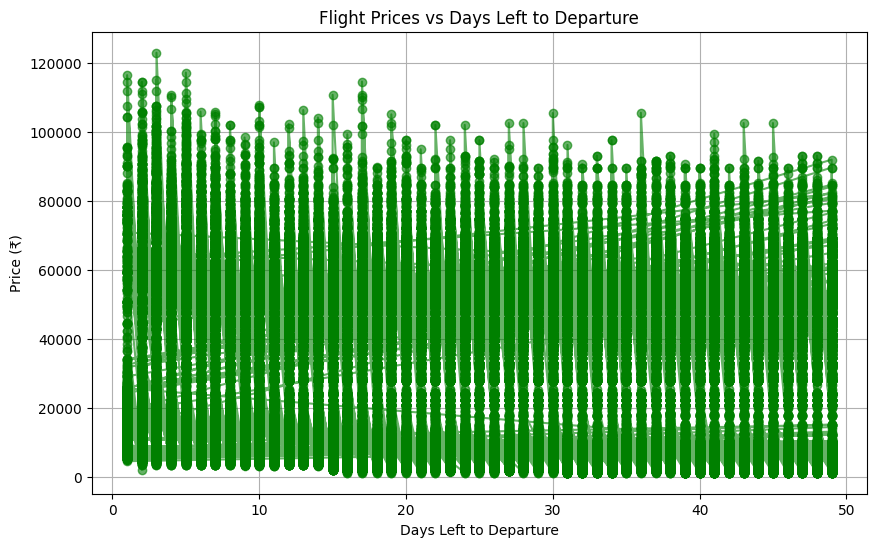

<Figure size 1000x600 with 0 Axes>

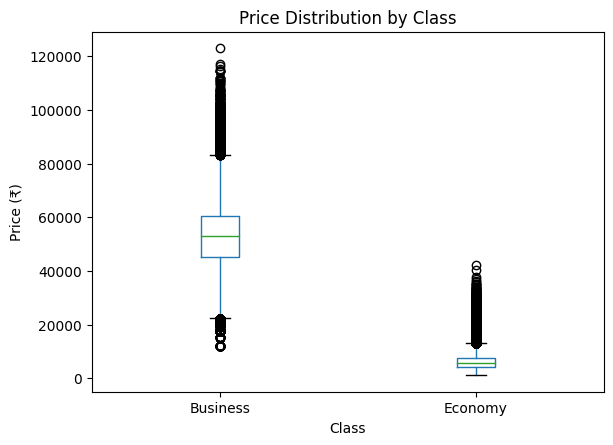

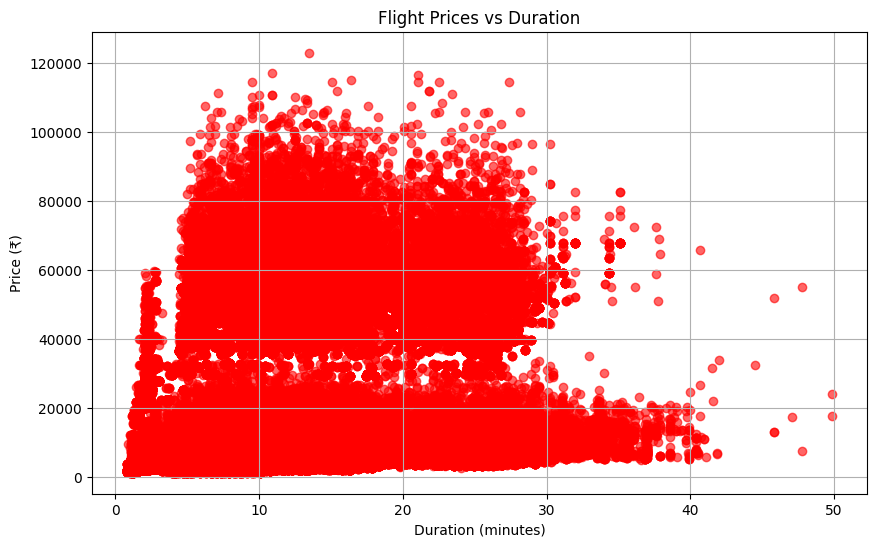

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


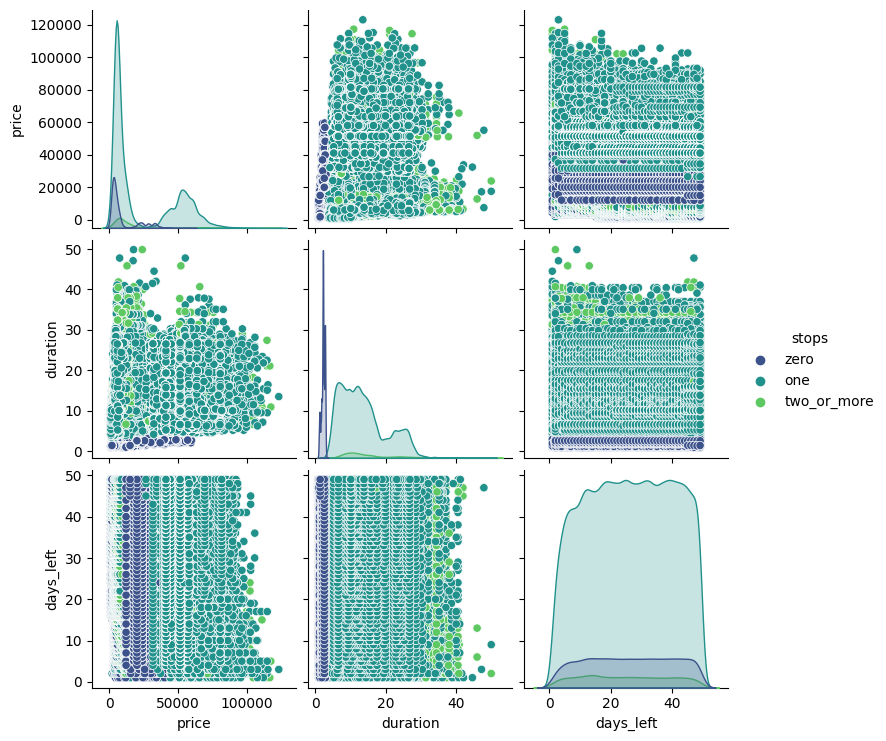

In [11]:

# Visualizing flight prices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# 1. Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('Actual vs Predicted Flight Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# 2. Line plot of flight prices over days left to departure (for example)
plt.figure(figsize=(10, 6))
plt.plot(clean_df['days_left'], clean_df['price'], color='green', marker='o', linestyle='-', alpha=0.6)
plt.title('Flight Prices vs Days Left to Departure')
plt.xlabel('Days Left to Departure')
plt.ylabel('Price (₹)')
plt.grid(True)
plt.show()

# 3. Boxplot to check the distribution of flight prices based on class
plt.figure(figsize=(10, 6))
clean_df.boxplot(column='price', by='class', grid=False)
plt.title('Price Distribution by Class')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Class')
plt.ylabel('Price (₹)')
plt.show()

# 4. Scatter plot showing price comparison with duration
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['duration'], clean_df['price'], color='red', alpha=0.6)
plt.title('Flight Prices vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price (₹)')
plt.grid(True)
plt.show()

# 5. Pairplot for feature-wise comparison
import seaborn as sns
sns.pairplot(clean_df[['price', 'duration', 'days_left', 'stops']], hue='stops', palette='viridis')
plt.show()


In [ ]:
# Train Random Forest Regressor
model = RandomForestRegressor()
model.fit(X, y)

# Save model elements
model_elements = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'numeric_cols': numeric_cols,
    'encoder_cols': encoder_cols,
}
joblib.dump(model_elements, "Flight_price_model.joblib")

# Function to calculate and display model accuracy
def calculate_accuracy():
    try:
        # Predict on the entire dataset
        y_pred = model.predict(X)
        
        # Compute accuracy metrics
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        
        # Display the metrics in a popup
        messagebox.showinfo("Model Accuracy", f"Mean Absolute Error (MAE): ₹{mae:,.2f}\n"
                                              f"Mean Squared Error (MSE): ₹{mse:,.2f}\n"
                                              f"R-squared (R²): {r2:.2f}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred while calculating accuracy: {e}")

# GUI Application for Prediction
def predict_price():
    # Gather input from the user
    try:
        airline = airline_entry.get()
        source_city = source_city_entry.get()
        departure_time = departure_time_entry.get()
        stops = stops_entry.get()
        arrival_time = arrival_time_entry.get()
        destination_city = destination_city_entry.get()
        flight_class = class_entry.get()
        duration = float(duration_entry.get())
        days_left = int(days_left_entry.get())

        # Prepare data for prediction
        new_input = pd.DataFrame([{
            'airline': airline,
            'source_city': source_city,
            'departure_time': departure_time,
            'stops': stops,
            'arrival_time': arrival_time,
            'destination_city': destination_city,
            'class': flight_class,
            'duration': duration,
            'days_left': days_left
        }])

        # Apply the same scaling and encoding as used in training
        new_input[numeric_cols] = scaler.transform(new_input[numeric_cols])
        new_encoded = encoder.transform(new_input[categorical_cols])
        X_new = np.hstack((new_input[numeric_cols], new_encoded))

        # Predict using the loaded model
        prediction = model.predict(X_new)
        price_label.config(text=f"Predicted Price: ₹{prediction[0]:,.2f}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Create the main window
root = Tk()
root.title("Flight Price Prediction")
root.geometry("500x600")
root.configure(bg='black')

# Add input fields
Label(root, text="Flight Price Prediction", font=("Arial", 20), fg="white", bg="black").pack(pady=10)
Label(root, text="Airline", fg="white", bg="black").pack()
airline_entry = Entry(root)
airline_entry.pack()

Label(root, text="Source City", fg="white", bg="black").pack()
source_city_entry = Entry(root)
source_city_entry.pack()

Label(root, text="Departure Time", fg="white", bg="black").pack()
departure_time_entry = Entry(root)
departure_time_entry.pack()

Label(root, text="Stops", fg="white", bg="black").pack()
stops_entry = Entry(root)
stops_entry.pack()

Label(root, text="Arrival Time", fg="white", bg="black").pack()
arrival_time_entry = Entry(root)
arrival_time_entry.pack()

Label(root, text="Destination City", fg="white", bg="black").pack()
destination_city_entry = Entry(root)
destination_city_entry.pack()

Label(root, text="Class (Economy/Business)", fg="white", bg="black").pack()
class_entry = Entry(root)
class_entry.pack()

Label(root, text="Duration (hours)", fg="white", bg="black").pack()
duration_entry = Entry(root)
duration_entry.pack()

Label(root, text="Days Left", fg="white", bg="black").pack()
days_left_entry = Entry(root)
days_left_entry.pack()

# Predict button
Button(root, text="Predict Price", command=predict_price, fg="black", bg="#d4ac0d", font=("Arial", 12)).pack(pady=20)

# Calculate accuracy button
Button(root, text="Calculate Model Accuracy", command=calculate_accuracy, fg="black", bg="#5dade2", font=("Arial", 12)).pack(pady=10)

# Output label for displaying the prediction
price_label = Label(root, text="", font=("Arial", 14), fg="#58d68d", bg="black")
price_label.pack(pady=10)

# Start the main loop
root.mainloop()

2024-12-05 22:36:31.493 Python[15452:1101193] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


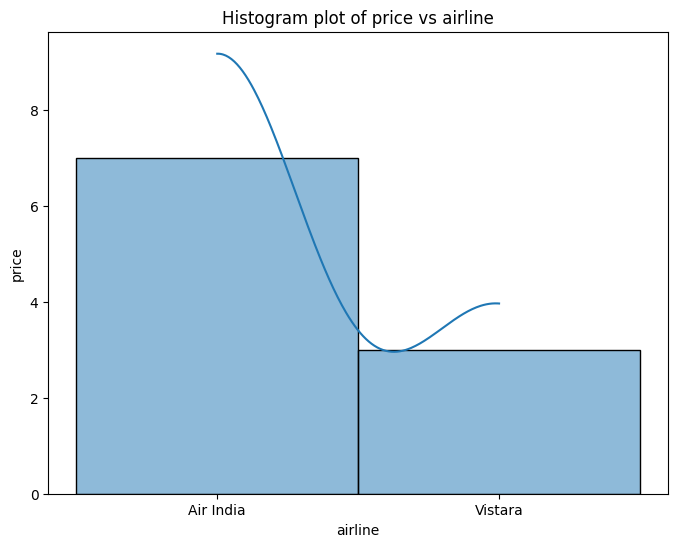

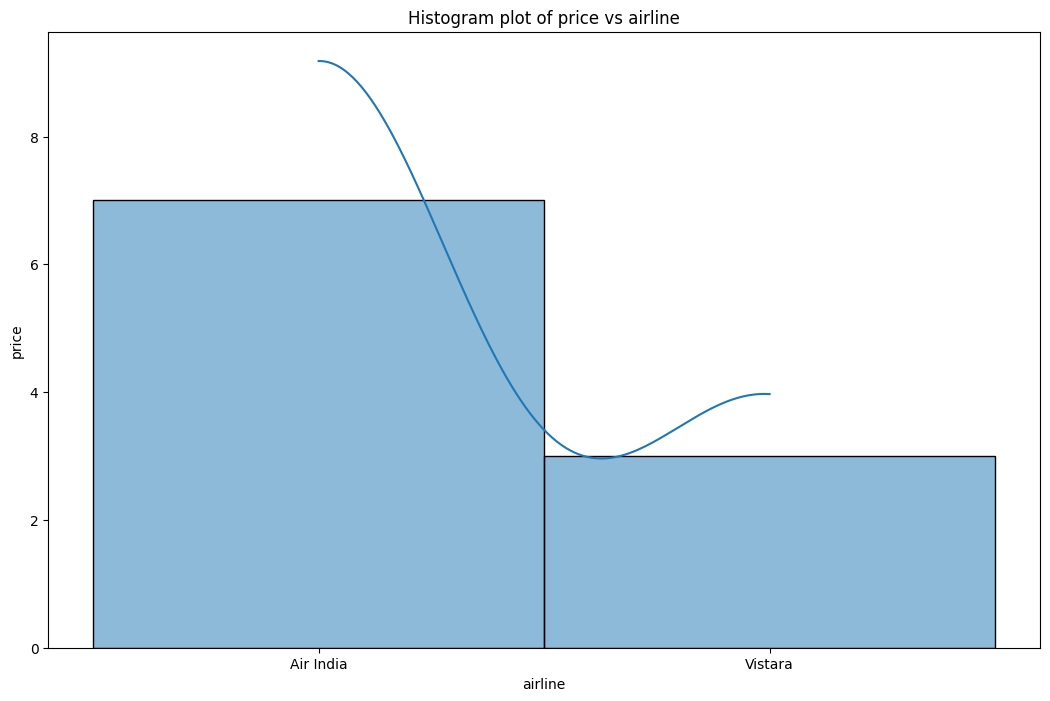

In [1]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading

class DataVisualizationApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Dynamic Data Visualization Tool")
        self.root.geometry("900x750")

        # Styling with ttk
        style = ttk.Style()
        style.theme_use("clam")  # Use a modern theme

        # Create the main frame
        main_frame = ttk.Frame(root, padding="10 10 10 10")
        main_frame.pack(fill=tk.BOTH, expand=True)

        # Title Label
        title_label = ttk.Label(main_frame, text="Data Visualization Tool", font=("Helvetica", 24))
        title_label.pack(pady=20)

        # Upload Button
        self.upload_button = ttk.Button(main_frame, text="Upload Dataset", command=self.upload_dataset)
        self.upload_button.pack(pady=10)

        # Plot Type Selection
        plot_type_frame = ttk.Frame(main_frame)
        plot_type_frame.pack(pady=10)
        
        plot_type_label = ttk.Label(plot_type_frame, text="Select Plot Type:", font=("Helvetica", 14))
        plot_type_label.grid(row=0, column=0, padx=10)

        self.plot_type = ttk.Combobox(plot_type_frame, values=["Scatter", "Line", "Bar", "Histogram", "Boxplot"], font=("Helvetica", 12))
        self.plot_type.grid(row=0, column=1, padx=10)
        self.plot_type.current(0)

        # X-axis Column Selection
        x_axis_frame = ttk.Frame(main_frame)
        x_axis_frame.pack(pady=10)

        column_x_label = ttk.Label(x_axis_frame, text="Select X-axis Column:", font=("Helvetica", 14))
        column_x_label.grid(row=0, column=0, padx=10)

        self.column_x = ttk.Combobox(x_axis_frame, values=[], font=("Helvetica", 12))
        self.column_x.grid(row=0, column=1, padx=10)

        # Y-axis Column Selection
        y_axis_frame = ttk.Frame(main_frame)
        y_axis_frame.pack(pady=10)

        column_y_label = ttk.Label(y_axis_frame, text="Select Y-axis Column:", font=("Helvetica", 14))
        column_y_label.grid(row=0, column=0, padx=10)

        self.column_y = ttk.Combobox(y_axis_frame, values=[], font=("Helvetica", 12))
        self.column_y.grid(row=0, column=1, padx=10)

        # Number of Data Points Selection
        data_points_frame = ttk.Frame(main_frame)
        data_points_frame.pack(pady=10)

        data_points_label = ttk.Label(data_points_frame, text="Number of Data Points:", font=("Helvetica", 14))
        data_points_label.grid(row=0, column=0, padx=10)

        self.data_points = tk.Entry(data_points_frame, font=("Helvetica", 12))
        self.data_points.grid(row=0, column=1, padx=10)
        self.data_points.insert(0, "20")  # Default value

        # Generate Plot Button
        self.plot_button = ttk.Button(main_frame, text="Generate Plot", command=self.run_plot_in_thread)
        self.plot_button.pack(pady=20)

        # Exit Button
        self.exit_button = ttk.Button(main_frame, text="Exit", command=root.quit)
        self.exit_button.pack(pady=10)

        # Initialize dataset variable
        self.dataset = None

    def upload_dataset(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                self.dataset = pd.read_csv(file_path)
                self.column_x['values'] = self.dataset.columns.tolist()
                self.column_y['values'] = self.dataset.columns.tolist()
                messagebox.showinfo("Success", "Dataset uploaded successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"Failed to upload dataset: {e}")

    def run_plot_in_thread(self):
        threading.Thread(target=self.generate_plot_popup).start()

    def generate_plot_popup(self):
        if self.dataset is not None:
            x_col = self.column_x.get()
            y_col = self.column_y.get()
            plot_type = self.plot_type.get().lower()

            try:
                n_points = int(self.data_points.get())  # Get the number of data points
            except ValueError:
                messagebox.showerror("Error", "Please enter a valid number for data points.")
                return

            if x_col and y_col and n_points > 0:
                try:
                    # Slice the dataset to use only the specified number of data points
                    data = self.dataset[[x_col, y_col]].head(n_points)

                    # Create a new window for the plot
                    plot_window = tk.Toplevel(self.root)
                    plot_window.title(f"{plot_type.capitalize()} Plot: {y_col} vs {x_col}")
                    plot_window.geometry("800x600")

                    # Use Matplotlib to generate the plot
                    plt.figure(figsize=(10, 6))
                    if plot_type == "scatter":
                        sns.scatterplot(data=data, x=x_col, y=y_col)
                    elif plot_type == "line":
                        sns.lineplot(data=data, x=x_col, y=y_col)
                    elif plot_type == "bar":
                        sns.barplot(data=data, x=x_col, y=y_col)
                    elif plot_type == "histogram":
                        sns.histplot(data=data[x_col], kde=True)
                    elif plot_type == "boxplot":
                        sns.boxplot(data=data, x=x_col, y=y_col)
                    else:
                        messagebox.showwarning("Warning", "Unsupported plot type selected.")
                        return

                    plt.title(f'{plot_type.capitalize()} plot of {y_col} vs {x_col}')
                    plt.xlabel(x_col)
                    plt.ylabel(y_col)

                    # Embed the plot in the popup window
                    canvas = FigureCanvasTkAgg(plt.gcf(), master=plot_window)
                    canvas.draw()
                    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

                except Exception as e:
                    messagebox.showerror("Error", f"Failed to generate plot: {e}")
            else:
                messagebox.showwarning("Warning", "Please select both X and Y axis columns and enter a valid number of data points.")
        else:
            messagebox.showwarning("Warning", "Please upload a dataset first.")

# Create the main window
root = tk.Tk()
app = DataVisualizationApp(root)
root.mainloop()
 